/home/mirko/Envs/pill-classification/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.


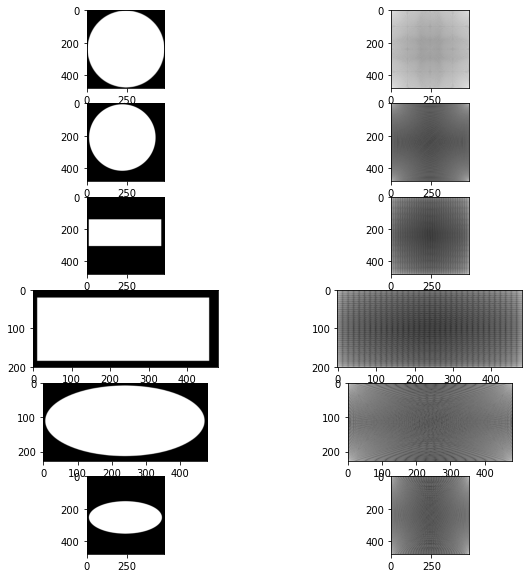

In [84]:
# Shape signature by fft

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2
from skimage import feature, io, transform, img_as_float, color
import os

images_dir = 'Dataset/consumer'
filenames = [
    'circle.png',
    'circle_2.png',
    'rectangle.png',
    'rectangle_2.png',
    'ellipse.png',
    'ellipse_2.png',
    'capsule',
    'triangle',
    'pentagon'
]

fig, ax = plt.subplots(6,2, figsize=(10,10))

Z = []
images = []
for i in range(6):
    filename = filenames[i]

    image = io.imread(os.path.join(images_dir, filename))
    image = color.rgb2gray(image)
    image = img_as_float(transform.resize(image, (int(image.shape[0]*(480/image.shape[1])), 480), anti_aliasing=True))
    
    images.append(image)
    
    Z.append(fft2(image))
    ax[i][0].imshow(image, cmap='gray')
    ax[i][1].imshow(20*np.log10(abs(Z[i])), cmap='gray')


In [103]:
from skimage import measure

for i in range(2):
    image = images[i]

    label_image = measure.label(image)

    # image_label_overlay = color.label2rgb(label_image, image=image, bg_label=0)
    # plt.imshow(image_label_overlay)


    regions = measure.regionprops(label_image)
    r = regions[0]

    metric = (4*np.pi*r.filled_area)/(r.perimeter**2)
    circularity = r.perimeter**2/(4*np.pi*r.filled_area)
    rap_axis = r.major_axis_length / r.minor_axis_length
    print('{}: {:.3f} {:.3f} {:3f}'.format(filenames[i], metric, circularity, rap_axis))
    
    contours = measure.find_contours(image, 0.8)
    contour = contours[0]
    
    print(len(contour))
    
    max_dist = np.argmax(max(map(lambda p: np.linalg.norm(p - r.centroid), contour)))
    print(contour[max_dist])

circle.png: 0.718 1.394 1.000000
1881
[474.01267016 259.        ]
circle_2.png: 0.888 1.126 1.000158
1635
[416.04870465 224.        ]


In [123]:
from skimage import measure

moments = []

for i in range(6):
    image = images[i]

    label_image = measure.label(image)

    # image_label_overlay = color.label2rgb(label_image, image=image, bg_label=0)
    # plt.imshow(image_label_overlay)


    regions = measure.regionprops(label_image)
    r = regions[0]
    
    hu = r.moments_normalized
    
    # Normalize hu

    moments.append(hu)
    
import cv2

for i in range(6):
    for j in range(6):
        d2 = cv2.matchShapes(images[i], images[j], cv2.CONTOURS_MATCH_I2,0)
        print('{:10} -- {:10}: {:.4f}'.format(filenames[i], filenames[j], d2))

circle.png -- circle.png: 0.0000
circle.png -- circle_2.png: 0.0000
circle.png -- rectangle.png: 0.2080
circle.png -- rectangle_2.png: 0.2090
circle.png -- ellipse.png: 0.1304
circle.png -- ellipse_2.png: 0.1294
circle_2.png -- circle.png: 0.0000
circle_2.png -- circle_2.png: 0.0000
circle_2.png -- rectangle.png: 0.2080
circle_2.png -- rectangle_2.png: 0.2090
circle_2.png -- ellipse.png: 0.1305
circle_2.png -- ellipse_2.png: 0.1294
rectangle.png -- circle.png: 0.2080
rectangle.png -- circle_2.png: 0.2080
rectangle.png -- rectangle.png: 0.0000
rectangle.png -- rectangle_2.png: 0.0044
rectangle.png -- ellipse.png: 0.3406
rectangle.png -- ellipse_2.png: 0.3463
rectangle_2.png -- circle.png: 0.2090
rectangle_2.png -- circle_2.png: 0.2090
rectangle_2.png -- rectangle.png: 0.0044
rectangle_2.png -- rectangle_2.png: 0.0000
rectangle_2.png -- ellipse.png: 0.3450
rectangle_2.png -- ellipse_2.png: 0.3507
ellipse.png -- circle.png: 0.1304
ellipse.png -- circle_2.png: 0.1305
ellipse.png -- rectang